# use class to encapsulate scraping functions

2021/01/03

# 1. Scraping

In [ ]:
%run -i 'STEP1_scraping_cleaning_merge.py'
from datetime import datetime

initial_panels = ['201812', '201907', '201908', '201912', '202001', '202002']
today = datetime.today()
current_panel = today.strftime("%Y%m")
print(current_panel)

for i in initial_panels:
    d1 = scrape(initial_panel=i,
                current_panel=current_panel
                ).create_dir(
                ).open_initial_panel_data(
                ).get_appids_from_initial_panel_data(
                ).scraping_apps_according_to_id()

In [9]:
tracking_path = '/home/naixin/Insync/naixin88@sina.cn/OneDrive/_____GWU_ECON_PHD_____/___Dissertation___/____WEB_SCRAPER____/TRACKING_THE_SAME_ID_MONTHLY_SCRAPE'

ispath = os.path.join(tracking_path, current_panel)
print(ispath)
if os.path.isfile(ispath) is False:
    os.makedirs(ispath)
    print("Directory '%s' created" %current_panel)
else:
    print("Directory '%s' has already been created" %current_panel)

/home/naixin/Insync/naixin88@sina.cn/OneDrive/_____GWU_ECON_PHD_____/___Dissertation___/____WEB_SCRAPER____/TRACKING_THE_SAME_ID_MONTHLY_SCRAPE/202108
Directory '202108' created


# Panels Track

In [2]:
panels_track = {
'201812':['201812', '201912', '202001', '202003', '202004', '202009', '202010',
          '202011', '202012', '202101', '202102', '202103', '202104',
          '202105', '202106', '202107'],
'201907':['201907', '201908', '201909', '201912', '202001', '202003', '202004',
          '202009', '202010', '202011', '202012', '202101', '202102', '202103',
          '202104', '202105', '202106', '202107'],
'201908':['201908', '201912', '202001', '202003', '202004', '202009', '202010',
          '202011', '202012', '202101', '202102', '202103', '202104', '202105',
          '202106', '202107'],
'201912':['201912', '202001', '202003', '202004', '202009', '202010', '202011',
          '202012', '202101', '202102', '202103', '202104', '202105', '202106',
          '202107'],
'202001':['202001', '202003', '202004', '202009', '202010', '202011', '202012',
          '202101', '202102', '202103', '202104', '202105', '202106', '202107'],
'202002':['202002', '202004', '202009', '202010', '202011', '202012', '202101',
          '202102', '202103', '202104', '202105', '202106', '202107']}

initial_panel = '201907'
all_panels = [
  '201907', '201908', '201909', '201912', '202001', '202003', '202004',
  '202009', '202010', '202011', '202012', '202101', '202102', '202103',
  '202104', '202105', '202106', '202107']

# 2. Convert
You can run this block without running the first scraping block.

In [ ]:
%run -i 'STEP1_scraping_cleaning_merge.py'

for initial_panel, all_panels in panels_track.items():
    d1 = convert(
        initial_panel=initial_panel,
        all_panels=all_panels
                 ).open_app_detail_dict(
                 ).merge_panels_into_single_df(
        balanced_panel = False
    )

# 3. Impute Missing and NLP
Since I will need interval data, so I will only impute from consecutive_panels

I have streamlined code and adjusted containsAds, offersIAP for ALL panels and impute
missing only if all their non-missing panels are the same value.
SAVED in 2021_04_08 / breakthrough_imputed_missing folder.

I will not impute or delete for size variable, since it contains such a large percentage of missing.

In the final regression, I will use a dummy to indicate whether size is missing.
(or simply does not include size).

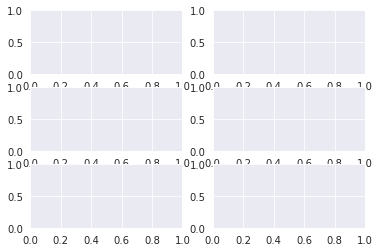

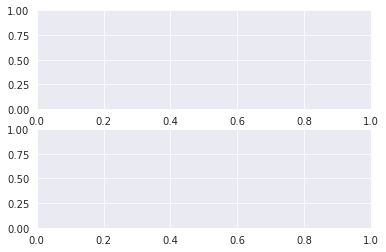

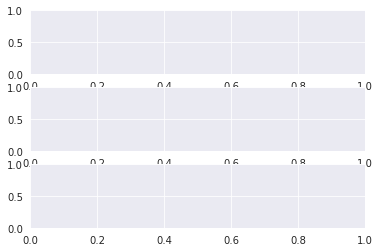

In [2]:
# %run -i 'STEP2_pre_processing.py'
%run -i "STEP3_stats_and_regs.py"

original_vars = ['minInstalls',
                        'score',
                        'reviews',
                        'ratings',
                        'price',
                        'released',
                        'updated',
                        'free',
                        'containsAds',
                        'offersIAP',
                        'contentRating',
                        'genreId'] # add merge_month for unbalanced panel

# dropped ratings variable, too much missing
# two things to note, containgAds and offerIAD are mostly missing in the first few months.
# for more than one imputation method, the list is like a pipe, you first go with previous, then use zero for missing in the first month
# The reasons for using more than one imputation method is because the missing is too many if I just use previous
imputation_var_methods_dict = {
    'time_variant':{
        'contentRating': ['mode'],
        'size': ['mode'],
        'released': ['mode'],
        'score': ['mean'],
        'reviews': ['mean'],
        'developer': ['previous'],
        'price': ['previous'],
        'minInstalls': ['previous'],
        'containsAds': ['mode if all months are the same', 'zero for missing in the first month', 'previous'],
        'adSupported': ['mode if all months are the same', 'zero for missing in the first month', 'previous'],
        'offersIAP': ['mode if all months are the same', 'zero for missing in the first month', 'previous'],},
    'time_invariant':{
        'description': ['any_other'], # the imputed description are used to generate both continuous niche and niche
        'genreId': ['mode']}
}

balanced_newly_created_vars = [
    'developerClean',
    'description_ModeClean',
    'non_top_firm',
    'ML',
    'MF'
]

unbalanced_newly_created_vars = [
    'developerClean',
    'description_ModeClean',
    'top_firm',
    'non_top_firm',
    'ML',
    'MF',
    'T_TO_TIER1_minInstalls',
    'noisy_death',
    'T_TO_top_firm',
    'MA'
]

----------------------------- kmeans_cluster ----------------------------
optimal k clusters---216
input matrix shape
(12412, 2201)
optimal k clusters---323
input matrix shape
(12412, 2201)
optimal k clusters---430
input matrix shape
(12412, 2201)
----------------------------- create_continuous_niche ----------------------------
cluster_num_216_kmeans_labels --- Number apps per cluster
----------------------------- _numApps_per_cluster ----------------------------
(216, 3)
   cluster_num_216_kmeans_labels  cluster_labels  num_apps_in_cluster
0                            102               1                  471
1                             16               2                  177
2                            139               3                  165
3                            211               4                  162
4                            140               5                  159
cluster_num_216_kmeans_labels merge in with text labels to assign each niche dummy to app ids
(12412, 

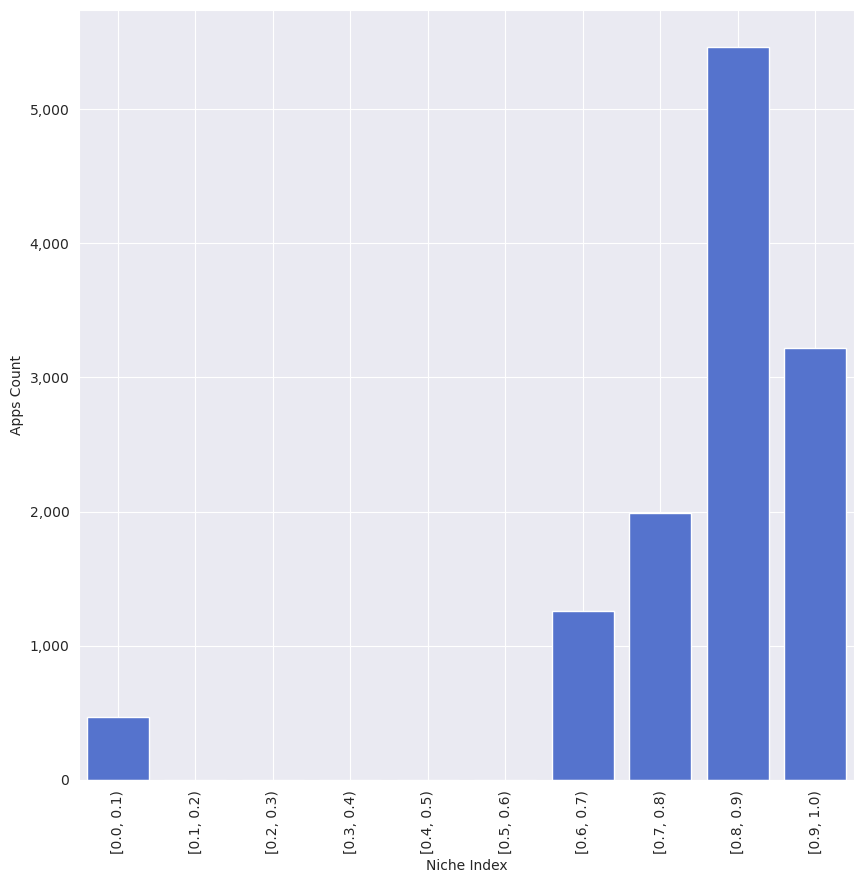

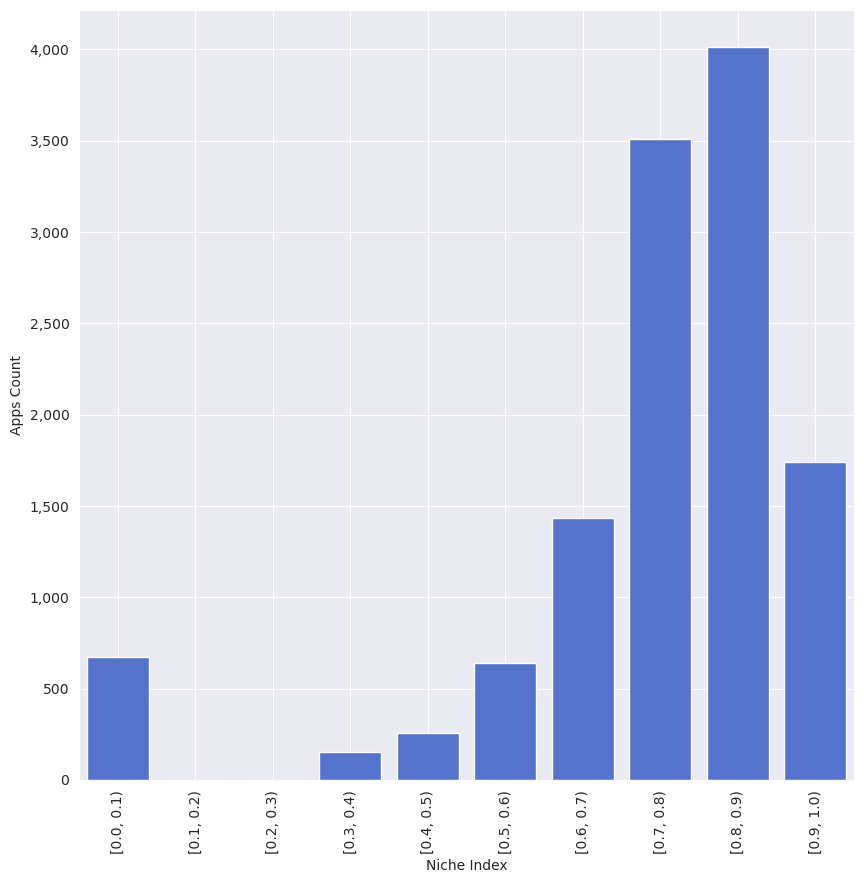

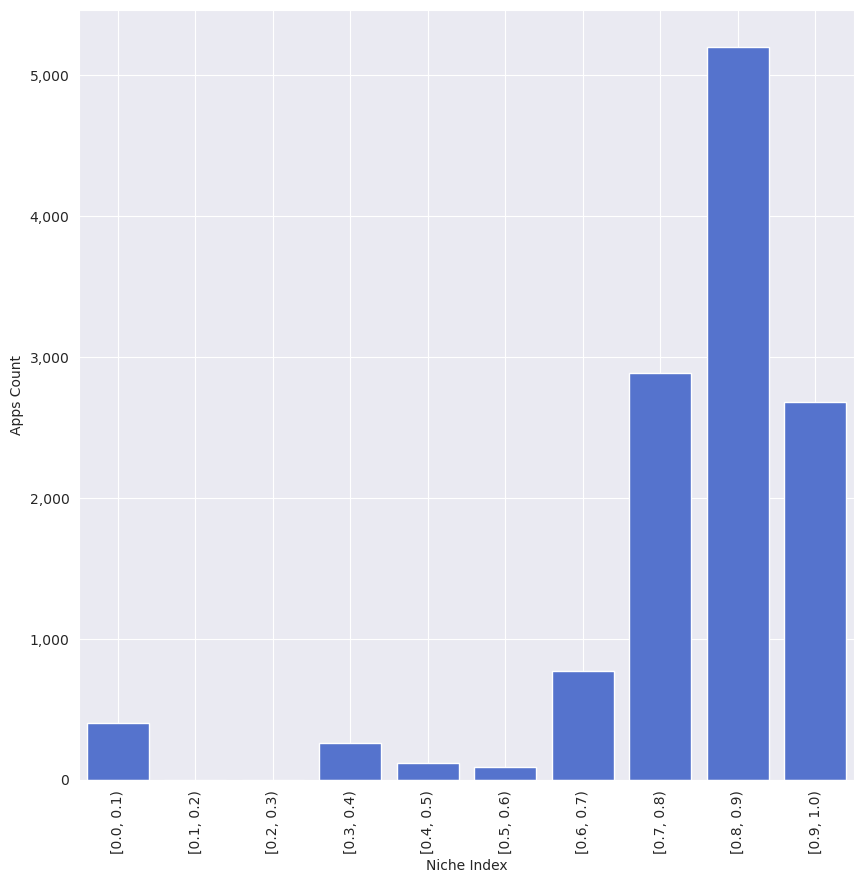

In [3]:
# for essay 3 unbalanced panel, balanced = False
# ***************************************************************************************
# 20220909: I decide to only use a single niche (FULL_FULL) for all sub-sample regressions
# and choosing SVD explained ratio as 0.95 is better due to observing the FULL FULL optimal graph
# ***************************************************************************************
%run -i "STEP2_pre_processing.py"
for b in [False, True]:
    if b is False:
        for initial_panel, all_panels in panels_track.items():
            if initial_panel == '201907':
                d1 = pre_processing(
                            initial_panel=initial_panel,
                            all_panels=all_panels,
                            tcn = 'description'
                    # ).impute_missing(
                    #         imputation_var_methods_dict=imputation_var_methods_dict,
                    #         balanced=b
                    # ).create_adultcontent_var(
                    #         balanced=b
                    # ).create_daysreleased_var(
                    #         balanced=b
                    # ).convert_true_false_to_1_0_dummies(
                    #             balanced=b,
                    #             vl = ['containsAds', 'offersIAP']
                    # ).clean_and_prepare_app_description(
                    #         balanced=b,
                    #         keep_only_unique_words=False
                    # ).remove_text_descriptions_with_too_few_or_too_many_tokens(
                    #         balanced=b,
                    #         LB_token_length_to_remove=20,
                    #         UP_token_length_to_remove=400
                    # ).create_top_firm_dummy(
                    #         balanced=b
                    # ).unbalanced_panel_create_TRANSITION_top_firm_and_MA_dummy(
                    # ).unbalanced_panel_create_TRANSITION_tier1_minInstalls(
                    # ).unbalanced_panel_create_noisy_death_dummy(
                    # ).create_sub_sample_dummies(
                    #         balanced=b
                    # ).find_optimal_tfidf_parameters(
                    #         binary=False,
                    #         trim=True
                    # ).graph_optimal_tfidf_param(
                    #     picked_fine_maxdf=0.7,
                    #     picked_fine_mindf=0.004
                    # ).transform_tfidf_matrix(
                    #             picked_maxdf=0.7,
                    #             picked_mindf=0.004,
                    #             binary=False
                    # ).find_optimal_svd_component(
                    #             picked_tfidf_param='0.7_0.004'
                    # ).graph_svd_optimal_components(
                    #             picked_tfidf_param='0.7_0.004',
                    #             picked_cutoff=0.95
                    # ).truncate_svd(
                    #         picked_tfidf_param='0.7_0.004',
                    #         expalined_ratio_cutoff=0.95,
                    #         random_state=0
                    # ).optimal_k_table(
                    #           method = 'elbow',
                    #           picked_tfidf_param='0.7_0.004',
                    #           expalined_ratio_cutoff=0.95,
                    #           num_intervals_between_cluster = 5
                    # ).graph_optimal_k(
                    #           method = 'elbow',
                    #           picked_tfidf_param='0.7_0.004',
                    #           picked_svd_comp=2201,
                    #           expalined_ratio_cutoff=0.95,
                    #           picked_optimal_k=3104
                    # ).refine_optimal_k_cluster(
                    #           picked_tfidf_param='0.7_0.004',
                    #           expalined_ratio_cutoff=0.95,
                    #           picked_svd_comp=2201,
                    #           picked_LB_num_cluster=2,
                    #           picked_UP_num_cluster=3104,
                    #           intervals=30
                    # ).graph_refined_optimal_k_silhouette_and_inertia(
                    #             picked_tfidf_param='0.7_0.004',
                    #             expalined_ratio_cutoff=0.95,
                    #             picked_optimal_k=323
                    ).kmeans_cluster(
                            random_state=0,
                            cluster_num_for_robustness_check=[216, 323, 430],
                            picked_tfidf_param='0.7_0.004',
                            expalined_ratio_cutoff=0.95
                    ).create_continuous_niche(
                            picked_tfidf_param='0.7_0.004'
                    ).full_histogram_continuous_niche(
                            picked_tfidf_param='0.7_0.004',
                            cluster_num_for_robustness_check=[216, 323, 430]
                    ).eyeball_niche_text(
                            cluster_num_for_robustness_check=[216, 323, 430],
                            picked_tfidf_param='0.7_0.004',
                            fraction=0.1
                    )


In [5]:
from platform import python_version

print(python_version())

3.10.6


# 4. Descriptive Statistics and Regression

['Unnamed: 0', 'im', 'sample', 'level_0', 'level_1', 'month', 0]
['Unnamed: 0', 'im', 'sample', 'level_0', 'level_1', 'month', 0]
['Unnamed: 0', 'im', 'sample', 'level_0', 'level_1', 'month', 0]
['Unnamed: 0', 'im', 'sample', 'level_0', 'level_1', 'month', 0]
['Unnamed: 0', 'im', 'sample', 'level_0', 'level_1', 'month', 0]
['Unnamed: 0', 'im', 'sample', 'level_0', 'level_1', 'month', 0]
['Unnamed: 0', 'im', 'sample', 'level_0', 'level_1', 'month', 0]
['Unnamed: 0', 'im', 'sample', 'level_0', 'level_1', 'month', 0]
['Unnamed: 0', 'im', 'sample', 'level_0', 'level_1', 'month', 0]
['Unnamed: 0', 'im', 'sample', 'level_0', 'level_1', 'month', 0]
['Unnamed: 0', 'im', 'sample', 'level_0', 'level_1', 'month', 0]
['Unnamed: 0', 'im', 'sample', 'level_0', 'level_1', 'month', 0]
['Unnamed: 0', 'im', 'sample', 'level_0', 'level_1', 'month', 0]
['Unnamed: 0', 'im', 'sample', 'level_0', 'level_1', 'month', 0]
['Unnamed: 0', 'im', 'sample', 'level_0', 'level_1', 'month', 0]
['Unnamed: 0', 'im', 'sam

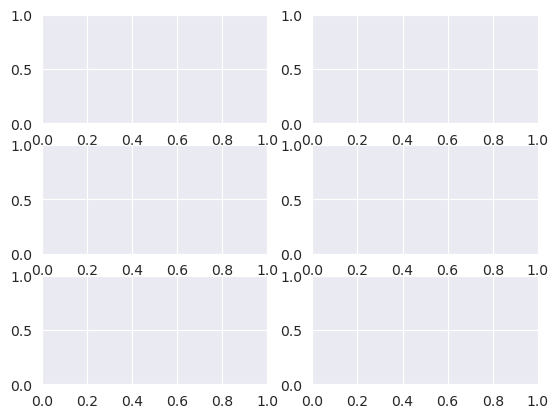

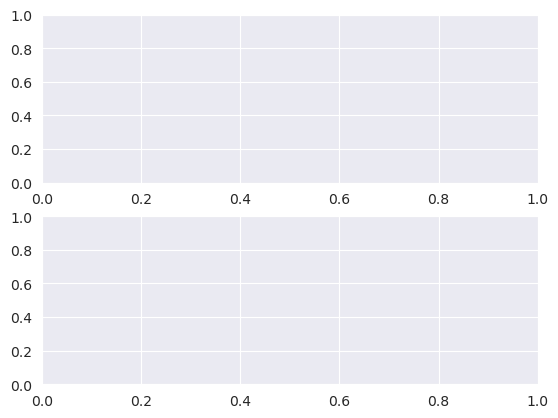

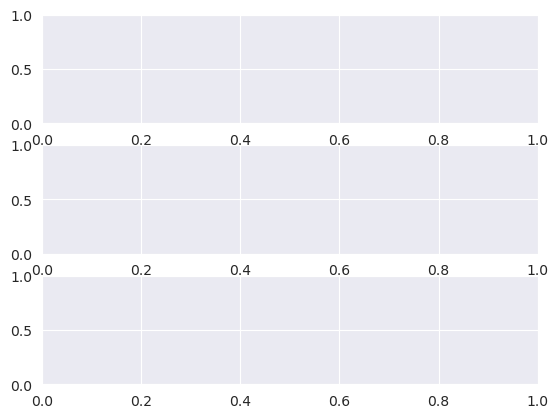

In [13]:
%run -i "STEP3_stats_and_regs.py"
for b in ['balanced', 'unbalanced']:
    if b == 'unbalanced':
        for initial_panel, all_panels in panels_track.items():
            if initial_panel == '201907':
                d1 = stats_and_regs(
                            initial_panel=initial_panel,
                            all_panels=all_panels
                    # ).create_subsample_dict_and_merge_in_niche(
                    #         picked_tfidf_param='0.7_0.004',
                    #         picked_k=323,
                    #         balanced=b
                    # ).convert_to_long(
                    #         picked_tfidf_param='0.7_0.004',
                    #         picked_k=323
                    # ).des_stats_as_in_dissertation_format(
                    #         picked_tfidf_param='0.7_0.004',
                    #         picked_k=323,
                    #         balanced=b
                    ).slice_relevant_parts_of_des_stats_table(
                            balanced=b,
                            cross_section=True,
                            picked_tfidf_param='0.7_0.004',
                            picked_k=323,
                            month=202107
                    # ).graph_y_against_binned_continuous_niche(
                    #         balanced=b,
                    #         bin_range=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
                    #         picked_tfidf_param='0.7_0.004',
                    #         picked_k=323,
                    #         m='202107'
                    # ).heatmap_among_variables(
                    #         balanced=b,
                    #         picked_tfidf_param='0.7_0.004',
                    #         picked_k=323,
                    #         month='202107'
                    # ).cross_section_regression(
                    #         balanced=b,
                    #         picked_tfidf_param='0.7_0.004',
                    #         picked_k=323,
                    #         month='202107',
                    #         stacked=False
                    # ).summarize_ols_results(
                    #         balanced=b,
                    #         stacked=False,
                    #         picked_tfidf_param='0.7_0.004',
                    #         picked_k=323,
                    #         month='202107'
                    # ).cross_section_regression(
                    #         balanced=b,
                    #         picked_tfidf_param='0.7_0.004',
                    #         picked_k=323,
                    #         month='202107',
                    #         stacked=True
                    # ).summarize_ols_results(
                    #         balanced=b,
                    #         stacked=True,
                    #         picked_tfidf_param='0.7_0.004',
                    #         picked_k=323,
                    #         month='202107'
                    # ).summarize_ols_results_in_graph(
                    #         balanced=b
                    # ).panel_regression(
                    #         balanced=b,
                    #         type='pooled_ols',
                    #         picked_tfidf_param='0.7_0.004',
                    #         picked_k=323
                    # ).summarize_panel_results(
                    #         balanced=b,
                    #         type='pooled_ols',
                    #         picked_tfidf_param='0.7_0.004',
                    #         picked_k=323
                )

  ## TEST


In [29]:
import pandas as pd
res = d1
# print(res.pvalues)
# print(res.params)
# print(res.summary)
df1 = pd.DataFrame(res.params)
df2 = pd.DataFrame(res.pvalues)
res_df = df1.join(df2, how='inner')
print(res_df)



                              parameter        pvalue
const                      9.643081e+00  0.000000e+00
continuous_niche           6.072879e-02  2.737350e-01
period_0                   2.619293e-03  9.733851e-01
period_0_continuous_niche  3.757109e-08  9.999997e-01
period_1                   6.103302e-02  3.325784e-01
period_1_continuous_niche -1.671093e-02  8.399944e-01
period_2                   1.277479e-01  4.268245e-02
period_2_continuous_niche  2.980735e-03  9.712721e-01
period_3                   2.036408e-01  3.017622e-03
period_3_continuous_niche -2.284556e-02  7.998627e-01
imputed_score             -3.516629e-01  0.000000e+00
nlog_imputed_reviews       7.347612e-01  0.000000e+00
imputed_adultcontent      -3.089296e-01  0.000000e+00
imputed_daysreleased      -1.509858e-05  1.250116e-02
imputed_size              -2.136622e-03  0.000000e+00
ML_GAME                   -2.041653e-01  0.000000e+00
ML_BUSINESS                8.608848e-02  1.333656e-06
ML_SOCIAL                 -3

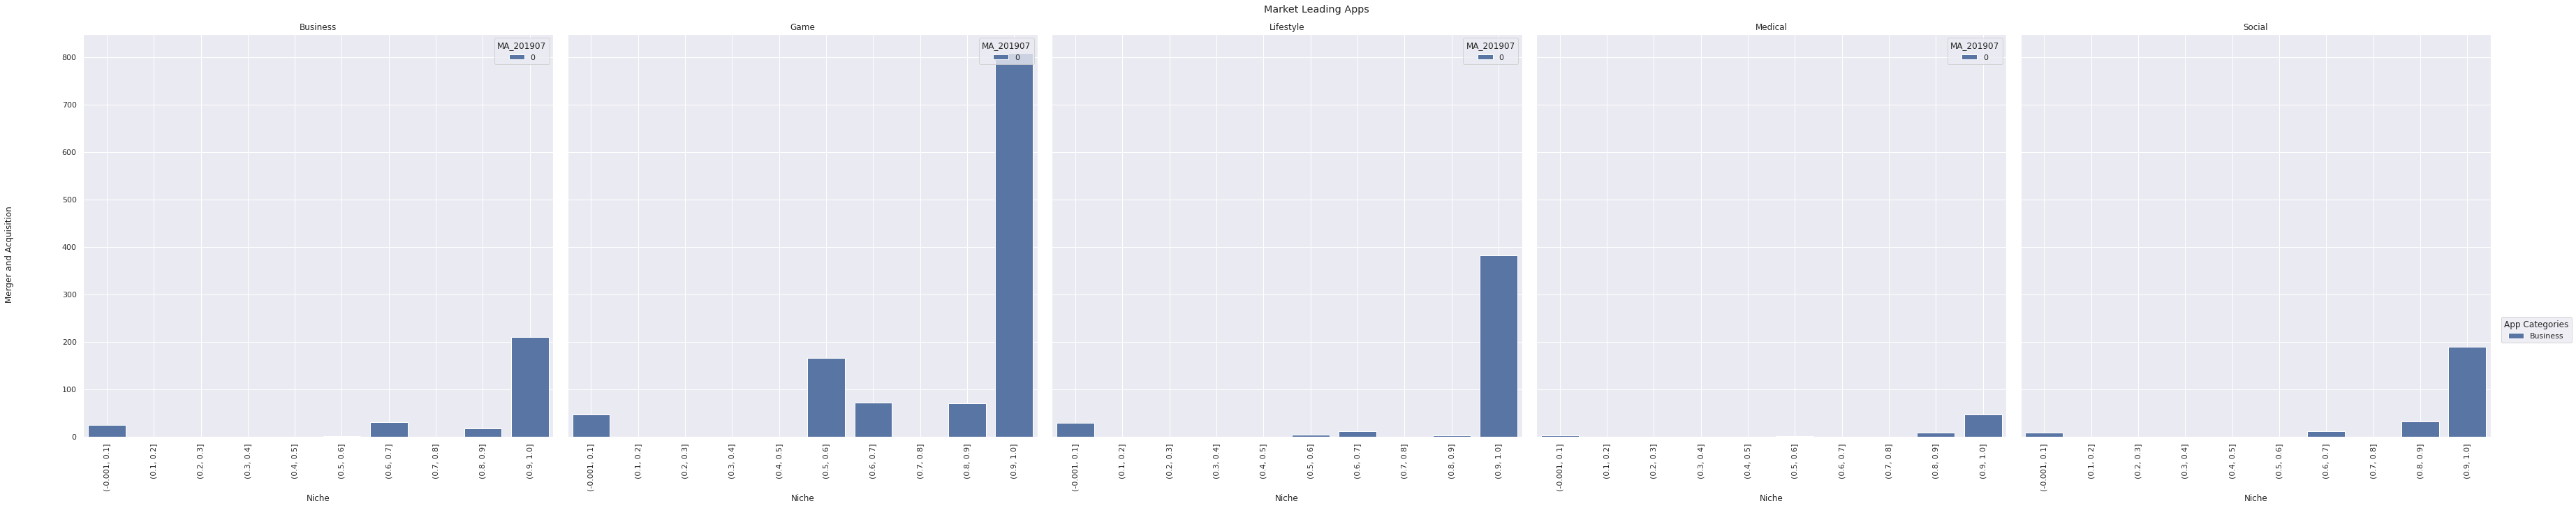

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(50,10), constrained_layout=True, sharex=True, sharey=True)
# draw it without hue and with hue
sns.set(style="darkgrid")
hue = ['ML_BUSINESS', 'ML_GAME', 'ML_LIFESTYLE', 'ML_MEDICAL', 'ML_SOCIAL']
hue_labels = ['Business', 'Game', 'Lifestyle', 'Medical', 'Social']
for i in range(len(hue)):
    df3 = df2.loc[df2['ML_CAT']==hue[i]]
    # print(df3.shape)
    # print(df3.head())
    sns.countplot(data=df3, x="continuous_niche_cut",
                  hue='MA_201907', ax=axs[i])
    axs[i].grid(True)
    axs[i].set_xlabel('Niche')
    axs[i].set_ylabel('')
    axs[i].set_title(hue_labels[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation = 90)
# plt.ylabel('Natural Log of the Lower Bound Install Brackets (Imputed)')
fig.text(-0.02, 0.5, 'Merger and Acquisition', ha='center', va='center', rotation='vertical')
h, l = axs[1].get_legend_handles_labels()
plt.legend(title="App Categories", handles=h,
           labels=['Business', 'Game', 'Lifestyle', 'Medical', 'Social'],
           bbox_to_anchor=(1.02, 0.3), loc='upper left', borderaxespad=0.1)
fig.suptitle('Market Leading Apps')
# ----------------- save ---------------------------------------
q = '/home/naixin/Insync/naixin88@sina.cn/OneDrive/_____GWU_ECON_PHD_____/___Dissertation___/___WEB_SCRAPER___/____DESCRIPTIVE_STATS____/GRAPHS/unbalanced/imputed/201907/continuous_niche/test.png'
fig.savefig(q, facecolor='w', edgecolor='w', dpi=300, bbox_inches='tight')

In [ ]:
f_name = '/home/naixin/Insync/naixin88@sina.cn/OneDrive/_____GWU_ECON_PHD_____/___Dissertation___/___WEB_SCRAPER___/____OLS_RESULTS____/summary_results/unbalanced_continuous_niche_imputed_ols_cross_sectional_results.csv'
df = pd.read_csv(f_name)
df.reset_index(inplace=True)
df.rename(columns={
    'Unnamed: 0': 'Month',
    'Unnamed: 1': 'Sub-sample'}, inplace=True)
df2 = df.loc[df['Sub-sample'].isin(['Tier1', 'Tier2']), ['Month', 'Sub-sample', "nlog_imputed_price"]].copy()
df2["nlog_imputed_price"] = df2['nlog_imputed_price'].apply(lambda x: x.replace('*', ''))
df2["nlog_imputed_price"] = pd.to_numeric(df2["nlog_imputed_price"])
df2['Month'] = pd.to_datetime(df2['Month'], format='%Y%m')
df2 = df2.sort_values(by=['Month'])
print(df2.head())
# print(df.columns)

In [ ]:
print(sns.color_palette("hls", 5))

In [ ]:
df2 = d1.original_dict['FULL']['FULL'].copy()
df2.reset_index(inplace=True)
df2.rename(columns = {'index': 'app_id'}, inplace=True)
# print(list(df2.columns))
all_panels = ['201907', '201908', '201909', '201912', '202001', '202003', '202004',
          '202009', '202010', '202011', '202012', '202101', '202102', '202103',
          '202104', '202105', '202106', '202107']
core_x = ['score', 'nlog_reviews', 'adultcontent', 'daysreleased', 'size', 'dummy_niche', 'continuous_niche', 'post', 'post_niche']
core_y = ['containsAdsdummy', 'offersIAPdummy', 'noisy_death', 'T_TO_TIER1_minInstalls', 'T_TO_top_firm', 'MA', 'nlog_price', 'nlog_minInstalls']
df3 = df2.loc[:, ['app_id', 'nlog_reviews_201907', 'nlog_reviews_202003', 'price_201907', 'price_202003']]
df3 = pd.wide_to_long(df3, ['nlog_reviews', 'price'], sep='_', i='app_id', j='year')
print(df3.head())


In [ ]:
df2 = d1.ss_data_dict['imputed']['FULL'].copy()

In [ ]:
from datetime import datetime
df3 = df2[['imputed_price_201907', 'imputed_size_201907']]
df3 = df3.describe().unstack(1).to_frame()
# value_counts_dfs = []
# for v in ['imputed_containsAdsdummy_201907', 'imputed_offersIAPdummy_201907']:
#     tabled = df3[v].value_counts(dropna=False).to_frame()
#     tabled = tabled.T
#     tabled.reset_index(inplace=True)
#     tabled.rename(columns = {'index':'variable'}, inplace=True)
#     value_counts_dfs.append(tabled)
# tabledum = pd.concat(value_counts_dfs, axis=0)
df3.reset_index(inplace=True)
df3['sample'] = 'FULL'
df3['im'] = 'original'
df3.insert(0, 'im', df3.pop('im'))
df3.insert(1, 'sample', df3.pop('sample'))
# round
df4 = df3.round(2)
print(df4)

In [ ]:
cols = ['after_1', 'after_2', 'A', 'B']
new_cols = [i for i in cols if 'after_' in i ]
months = ['201907', '201908']
new_cols = ['continuous_niche_' + m for m in months]
print(new_cols)

In [ ]:
'Tier1', 'Tier2', 'top_firm', 'FULL_GAME', 'FULL_BUSINESS', 'FULL_SOCIAL', 'FULL_MEDICAL',
 'ML_GAME', 'ML_BUSINESS', 'ML_SOCIAL', 'ML_MEDICAL',
 'MF_GAME', 'MF_BUSINESS', 'MF_SOCIAL', 'MF_MEDICAL',